<a href="https://colab.research.google.com/github/trong-shen/Game-of-Throne-Project/blob/master/GOT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the CSV file from Github

In [1]:
import pandas as pd
import numpy as np
import string
!pip install nltk
import nltk
nltk.download('all')


GOT= pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/Game_of_Thrones_Script_clean.csv')
char_info=pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/got_table.csv')
print(len(GOT))

#Extract only the house data from char_info
House=char_info[['name','house']]

#Created a function to apply globally to the data frame
def return_house(name):
  house_dict=dict(zip(House.name,House.house))
  try: 
    house=house_dict[name]
    return(house)
  except KeyError:
    return(float("Nan"))

# Apply the house dict function to the whole GOT dataframe
GOT['House']=GOT['Name'].apply(lambda x:return_house(x))


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [0]:
#list of contractions and the expanded mapping used for cleaning the data
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


In [0]:
#define a function, expand_contractions, which takes a string and expands all contractions within the string using contraction_map
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    expanded = ''
    text = text.lower() #make all text lowercase
    wordList = text.split() #put text into a list of words
    for i in range(len(wordList)):
        if wordList[i] in contraction_mapping.keys(): #for each word, if it is a contraction in the listing
            expanded = expanded + ' ' + contraction_mapping[wordList[i]] #then replace with the expanded version
        else:
            expanded = expanded + ' ' + wordList[i] #otherwise, keep the original word
    return expanded

#define a function, remove_punctuation, which takes in a string and removes all punctuation 
def remove_punctuation(s):
    s = s.translate(str.maketrans('','',string.punctuation)) #take out punctuation in the sentence
    j = nltk.word_tokenize(s.lower()) #put each word in the sentence within a list, j
    return s

#define function, clean_sentences, which removes punctuation and expands all contractions in a sentence
def clean_sentences(text):
    return remove_punctuation(expand_contractions(text))
    

In [0]:
#Expand contractions, remove punctuation all in one function clean_sentence
GOT['Sentences_Clean'] = GOT.Sentence.apply(lambda x:clean_sentences(x))


In [0]:
#Calculate words per line, assuming contractions are all expanded
GOT["Num_Words"] = GOT.Sentences_Clean.apply(lambda x: len(x.split()))
GOT.to_csv (r'GOT_house_csv.csv', index = False, header=True)

# Now we will  prepare data for our Machine Learning Predictive model by only looking at msotly season 1 data and a subsection of season 2 data


In [6]:
#Extract only season one data and two data
GOT1=GOT[GOT.Season=="Season 1"]
GOT2=GOT[GOT.Season=="Season 2"]

print(GOT1.head())
print(GOT1.info())

print(GOT2.head())
print(GOT1.info())

  Release Date  ... Num_Words
0    4/17/2011  ...        27
1    4/17/2011  ...        23
2    4/17/2011  ...         5
3    4/17/2011  ...         5
4    4/17/2011  ...         7

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3179 entries, 0 to 3178
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Release Date     3179 non-null   object
 1   Season           3179 non-null   object
 2   Episode          3179 non-null   object
 3   Episode Title    3179 non-null   object
 4   Name             3179 non-null   object
 5   Sentence         3179 non-null   object
 6   House            2907 non-null   object
 7   Sentences_Clean  3179 non-null   object
 8   Num_Words        3179 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 248.4+ KB
None
     Release Date    Season  ...                     Sentences_Clean Num_Words
3179     4/1/2012  Season 2  ...        well struck… well str

In [7]:
# Keep character lines if and only if they still exist in season 2

#Find a unique list of characters in season 2

char_S2=GOT2.Name.unique()
print(len(char_S2))

#Filter S1 data if characters are in S2
GOT1_modified=GOT1[GOT1['Name'].isin(char_S2)]
print(len(GOT1_modified.Name.unique()))
print(GOT1_modified.Name.unique())

136
49
['jon snow' 'sansa stark' 'robb stark' 'catelyn stark' 'bran stark'
 'theon greyjoy' 'jaime lannister' 'cersei lannister' 'luwin' 'arya stark'
 'tyrion lannister' 'ros' 'daenerys targaryen' 'jorah mormont'
 'khal drogo' 'sandor clegane' 'doreah' 'irri' 'joffrey lannister'
 'myrcella baratheon' 'rodrick cassel' 'soldier' 'varys' 'renly baratheon'
 'petyr baelish' 'grand maester pycelle' 'guard' 'jeor mormont' 'grenn'
 'lancel lannister' 'rakharo' 'yoren' 'sam tarly' 'janos'
 'gendry baratheon' 'bronn' 'loras tyrell' 'osha' 'wildling' 'man'
 'tywin lannister' 'meryn trant' 'kevan lannister' 'all' 'prostitute'
 'shae' 'rickon stark' 'karstark' 'hot pie']


In [8]:
#Further filter based on characters of interest 
#removing generic characters such as solider, guard, prostitute, etc
important_names=np.delete(GOT1_modified.Name.unique(),(21,26,38,39,43,44));
print(important_names)


print(len(important_names))

GOT1_modified=GOT1_modified[GOT1_modified['Name'].isin(important_names)]
GOT1_modified.head()
print(len(GOT1_modified.Name.unique()))

GOT1_modified.info()
GOT1=GOT1_modified
GOT1.info()

['jon snow' 'sansa stark' 'robb stark' 'catelyn stark' 'bran stark'
 'theon greyjoy' 'jaime lannister' 'cersei lannister' 'luwin' 'arya stark'
 'tyrion lannister' 'ros' 'daenerys targaryen' 'jorah mormont'
 'khal drogo' 'sandor clegane' 'doreah' 'irri' 'joffrey lannister'
 'myrcella baratheon' 'rodrick cassel' 'varys' 'renly baratheon'
 'petyr baelish' 'grand maester pycelle' 'jeor mormont' 'grenn'
 'lancel lannister' 'rakharo' 'yoren' 'sam tarly' 'janos'
 'gendry baratheon' 'bronn' 'loras tyrell' 'osha' 'tywin lannister'
 'meryn trant' 'kevan lannister' 'shae' 'rickon stark' 'karstark'
 'hot pie']
43
43
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 15 to 3178
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Release Date     2120 non-null   object
 1   Season           2120 non-null   object
 2   Episode          2120 non-null   object
 3   Episode Title    2120 non-null   object
 4   Name  

In [9]:
#Tokenize the words and remove between words punctunations
tokenizer=nltk.RegexpTokenizer(r"\w+")
GOT1['Tokenized_Sentence']=GOT1.Sentences_Clean.apply(lambda x:tokenizer.tokenize(x.lower()))
GOT1.head(100)


,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence
15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"[go, on, fathers, watching]"
16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,"[and, your, mother]"
18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,"[thank, you]"
21,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",House Stark,do not think too much bran,6,"[do, not, think, too, much, bran]"
22,4/17/2011,Season 1,Episode 1,Winter is Coming,robb stark,Relax your bow arm.,House Stark,relax your bow arm,4,"[relax, your, bow, arm]"
...,...,...,...,...,...,...,...,...,...,...
163,4/17/2011,Season 1,Episode 1,Winter is Coming,tyrion lannister,"She has odd cravings, our sister.",House Lannister,she has odd cravings our sister,6,"[she, has, odd, cravings, our, sister]"
164,4/17/2011,Season 1,Episode 1,Winter is Coming,jaime lannister,"A family trait. Now, the Starks are feasting u...",House Lannister,a family trait now the starks are feasting us...,19,"[a, family, trait, now, the, starks, are, feas..."
165,4/17/2011,Season 1,Episode 1,Winter is Coming,tyrion lannister,"I'm sorry, I've begun the feast a bit early. A...",House Lannister,i am sorry i have begun the feast a bit early...,19,"[i, am, sorry, i, have, begun, the, feast, a, ..."
166,4/17/2011,Season 1,Episode 1,Winter is Coming,jaime lannister,I thought you might say that. But since we're ...,House Lannister,i thought you might say that but since we are...,20,"[i, thought, you, might, say, that, but, since..."


In [0]:
#Remove stopwords for sentiment analysis
stopword=nltk.corpus.stopwords.words('english')


In [0]:
#Define a function to remove stop words
def remove_stopwords(tokenized_sentence):
  text=[word for word in tokenized_sentence if word not in stopword]
  return text

In [12]:
#Implement the stop words function to a new column 
GOT1['Tokenized_No_Stop']=GOT1.Tokenized_Sentence.apply(lambda x:remove_stopwords(x))
GOT1.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop
15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"[go, on, fathers, watching]","[go, fathers, watching]"
16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,"[and, your, mother]",[mother]
18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,"[thank, you]",[thank]
21,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",House Stark,do not think too much bran,6,"[do, not, think, too, much, bran]","[think, much, bran]"
22,4/17/2011,Season 1,Episode 1,Winter is Coming,robb stark,Relax your bow arm.,House Stark,relax your bow arm,4,"[relax, your, bow, arm]","[relax, bow, arm]"


In [13]:
# Stemming of the Non Stop Words Column
wn=nltk.WordNetLemmatizer()

def stem_reduction(tokenized_sentence):
  sentence=[wn.lemmatize(word) for word in tokenized_sentence]
  return (sentence)

GOT1['Stemmed_Sentence']=GOT1['Tokenized_No_Stop'].apply(lambda x:stem_reduction(x))
GOT1.tail()

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence
3173,6/19/2011,Season 1,Episode 10,Fire and Blood,jorah mormont,Don't ask me to stand aside as you climb on th...,House Mormont,do not ask me to stand aside as you climb on ...,19,"[do, not, ask, me, to, stand, aside, as, you, ...","[ask, stand, aside, climb, pyre, l, watch, burn]","[ask, stand, aside, climb, pyre, l, watch, burn]"
3174,6/19/2011,Season 1,Episode 10,Fire and Blood,daenerys targaryen,ls that what you fear? You will be my khalasar...,House Targaryen,ls that what you fear you will be my khalasar...,47,"[ls, that, what, you, fear, you, will, be, my,...","[ls, fear, khalasar, l, see, faces, slaves, l,...","[l, fear, khalasar, l, see, face, slave, l, fr..."
3175,6/19/2011,Season 1,Episode 10,Fire and Blood,daenerys targaryen,"Ser Jorah, bind this woman to the pyre. You sw...",House Targaryen,ser jorah bind this woman to the pyre you swo...,13,"[ser, jorah, bind, this, woman, to, the, pyre,...","[ser, jorah, bind, woman, pyre, swore, obey]","[ser, jorah, bind, woman, pyre, swore, obey]"
3177,6/19/2011,Season 1,Episode 10,Fire and Blood,daenerys targaryen,I will. But it is not your screams I want. Onl...,House Targaryen,i will but it is not your screams i want only...,13,"[i, will, but, it, is, not, your, screams, i, ...","[screams, want, life]","[scream, want, life]"
3178,6/19/2011,Season 1,Episode 10,Fire and Blood,jorah mormont,Blood of my blood.,House Mormont,blood of my blood,4,"[blood, of, my, blood]","[blood, blood]","[blood, blood]"


In [14]:
#Join the Tokenized Stemmed_Sentence into a string of sentence for the VADER sentiment analysis

def convert_sentence (tokenized_sentence):
  sentence=''
  for word in tokenized_sentence:
    sentence=sentence+" "+word
  return sentence

GOT1['Stemmed_Sentence_Non_Token']=GOT1['Stemmed_Sentence'].apply(lambda x:convert_sentence(x))

GOT1['Stemmed_Sentence_Non_Token'].head()




15     go father watching
16                 mother
18                  thank
21        think much bran
22          relax bow arm
Name: Stemmed_Sentence_Non_Token, dtype: object

In [18]:
#Use Vader Sentiment analysis tool 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

GOT1['Sentiment']=GOT1['Stemmed_Sentence_Non_Token'].apply(lambda x:sid.polarity_scores(x))

def compound_score(Sentiment):
  return(Sentiment['compound'])

GOT1['Sentiment_Compound_Score']=GOT1['Sentiment'].apply(lambda x:compound_score(x))
GOT1.head(100)


,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence,Stemmed_Sentence_Non_Token,Sentiment,Sentiment_Compound_Score
15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"[go, on, fathers, watching]","[go, fathers, watching]","[go, father, watching]",go father watching,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,"[and, your, mother]",[mother],[mother],mother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,"[thank, you]",[thank],[thank],thank,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612
21,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",House Stark,do not think too much bran,6,"[do, not, think, too, much, bran]","[think, much, bran]","[think, much, bran]",think much bran,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
22,4/17/2011,Season 1,Episode 1,Winter is Coming,robb stark,Relax your bow arm.,House Stark,relax your bow arm,4,"[relax, your, bow, arm]","[relax, bow, arm]","[relax, bow, arm]",relax bow arm,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,4/17/2011,Season 1,Episode 1,Winter is Coming,tyrion lannister,"She has odd cravings, our sister.",House Lannister,she has odd cravings our sister,6,"[she, has, odd, cravings, our, sister]","[odd, cravings, sister]","[odd, craving, sister]",odd craving sister,"{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'comp...",-0.3182
164,4/17/2011,Season 1,Episode 1,Winter is Coming,jaime lannister,"A family trait. Now, the Starks are feasting u...",House Lannister,a family trait now the starks are feasting us...,19,"[a, family, trait, now, the, starks, are, feas...","[family, trait, starks, feasting, us, sundown,...","[family, trait, starks, feasting, u, sundown, ...",family trait starks feasting u sundown leave ...,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp...",-0.2960
165,4/17/2011,Season 1,Episode 1,Winter is Coming,tyrion lannister,"I'm sorry, I've begun the feast a bit early. A...",House Lannister,i am sorry i have begun the feast a bit early...,19,"[i, am, sorry, i, have, begun, the, feast, a, ...","[sorry, begun, feast, bit, early, first, many,...","[sorry, begun, feast, bit, early, first, many,...",sorry begun feast bit early first many course,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",-0.0772
166,4/17/2011,Season 1,Episode 1,Winter is Coming,jaime lannister,I thought you might say that. But since we're ...,House Lannister,i thought you might say that but since we are...,20,"[i, thought, you, might, say, that, but, since...","[thought, might, say, since, short, time, come...","[thought, might, say, since, short, time, come...",thought might say since short time come girl ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [21]:
#Set the character and house to category

GOT1.info()
GOT1['Name'].astype('category')
GOT1['House'].astype('category')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 15 to 3178
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release Date                2120 non-null   object 
 1   Season                      2120 non-null   object 
 2   Episode                     2120 non-null   object 
 3   Episode Title               2120 non-null   object 
 4   Name                        2120 non-null   object 
 5   Sentence                    2120 non-null   object 
 6   House                       2081 non-null   object 
 7   Sentences_Clean             2120 non-null   object 
 8   Num_Words                   2120 non-null   int64  
 9   Tokenized_Sentence          2120 non-null   object 
 10  Tokenized_No_Stop           2120 non-null   object 
 11  Stemmed_Sentence            2120 non-null   object 
 12  Stemmed_Sentence_Non_Token  2120 non-null   object 
 13  Sentiment                   2120

15          House Stark
16          House Stark
18          House Stark
21          House Stark
22          House Stark
             ...       
3173      House Mormont
3174    House Targaryen
3175    House Targaryen
3177    House Targaryen
3178      House Mormont
Name: House, Length: 2120, dtype: category
Categories (17, object): [0, Dothraki, Free Folk, House Baelish, ..., House Tarly,
                          House Trant, House Tyrell, Night's Watch]

In [24]:
#A Pivot Table to Show mean Compiund_Score by House
table=pd.pivot_table(GOT1,values='Sentiment_Compound_Score',index=['House'],aggfunc='mean')
table

,Sentiment_Compound_Score
House,
0,0.098985
Dothraki,-0.108385
Free Folk,0.064064
House Baelish,0.126756
House Baratheon,-0.064415
House Bronn,-0.003824
House Cassel,-0.127362
House Clegane,-0.095792
House Greyjoy,-0.038064


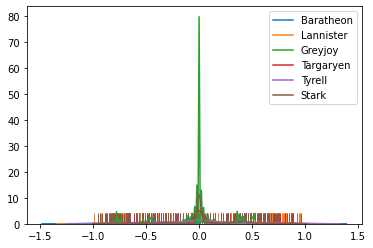

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Plotting distributions 
House_Baelish=GOT1[GOT1.House=='House Baelish']
House_Baratheon=GOT1[GOT1.House=='House Baratheon']
House_Clegane=GOT1[GOT1.House=='House Clegane']
House_Lannister=GOT1[GOT1.House=='House Lannister']
House_Greyjoy=GOT1[GOT1.House=='House Greyjoy']
House_Targaryen=GOT1[GOT1.House=='House Targaryen']
House_Tyrell=GOT1[GOT1.House=='House Tyrell']
House_Stark=GOT1[GOT1.House=='House Stark']

#sns.distplot(House_Baelish[['Sentiment_Compound_Score']], hist=False, rug=True,label='Baelish')
sns.distplot(House_Baratheon[['Sentiment_Compound_Score']], hist=False, rug=True,label='Baratheon')

#sns.distplot(House_Clegane[['Sentiment_Compound_Score']], hist=False, rug=True,label='Clegane')

sns.distplot(House_Lannister[['Sentiment_Compound_Score']], hist=False, rug=True, label='Lannister')

sns.distplot(House_Greyjoy[['Sentiment_Compound_Score']], hist=False, rug=True,label='Greyjoy')
sns.distplot(House_Targaryen[['Sentiment_Compound_Score']], hist=False, rug=True,label='Targaryen')
sns.distplot(House_Tyrell[['Sentiment_Compound_Score']], hist=False, rug=True,label='Tyrell')
sns.distplot(House_Stark[['Sentiment_Compound_Score']], hist=False, rug=True,label='Stark')

plt.show()